## Compito di esame

Data la funzione

$$f(x)=\frac{sin^2(x+7/2)\cdot exp(1/5-2\cdot x)}{log(x+5)}$$

Scrivere lo script python  in cui

-  a) si disegni in figura 1 il grafico di f e si dica quanti zeri reali ha la funzione nel dominio [−2, 4];
                                                 Punti: 2
-  b) si utilizzi il metodo di Newton per determinare le radici dell’equazione f(x) = 0 con iterati iniziali x0 = −1 e x0 = 4, assumendo come tolleranza per il test d’arresto sull’incremento tolx = 1.e − 15 e come tolleranza per il test del residuo tolf = 1.e − 15; 
                                                                                                        Punti: 5

-  c) si disegni in figura 2 l’andamento deegli iterati ottenute a partire dai valori di innesco x0 = −1 e x0 = 4;
                                                                                                       Punti: 2

- d) si calcoli, nei due casi implementati al punto b), una stima dell’ordine di convergenza del metodo;
                                                 Punti: 3
- e) qualora l’ordine di convergenza non risulti ottimale, si modifichi opportunamente il metodo di Newton per renderlo tale (motivando la modifica implementata). 
                                                Punti: 4


In [9]:
import math
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath('../Scheletri'))

# Step 2: Import the functions or classes from Schel_FULL
import Schel_FULL as sf

Zero di x = -1 in:  -0.3584073606973445
Numero iterazioni di x = -1 =  27
Iterati di x = -1:  [-0.7941384267080851, -0.6393701684816213, -0.5293083592518808, -0.4565169682693565, -0.4120039041841199, -0.3866381053191921, -0.37293340418617205, -0.36578109568149586, -0.3621230262712238, -0.3602725367962445, -0.35934179843198666, -0.3588750390671854, -0.35864130970743907, -0.35852435733955995, -0.358465859199896, -0.3584366046369087, -0.3584219759815976, -0.35841466131042155, -0.3584110038889453, -0.3584091751567339, -0.3584082607852598, -0.3584078035981806, -0.35840757500430553, -0.3584074607072841, -0.35840740355875245, -0.3584073749844814, -0.3584073606973445]
Zero di x = 4 in:  5.924772543716909
Numero iterazioni di x = 4 =  21
Iterati di x = 4:  [4.762500625902008, 5.106060784254868, 5.361570020709316, 5.553556365108507, 5.692870097850675, 5.7880318886992805, 5.848369742358047, 5.883877446915109, 5.903519815188005, 5.9139250145034135, 5.919292330599942, 5.9220199238692, 5.92339508044

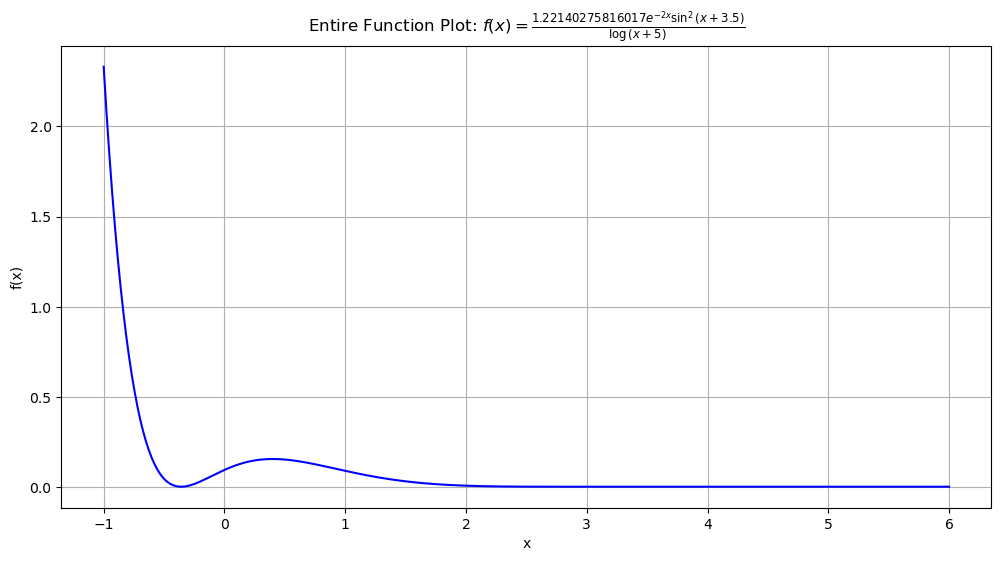

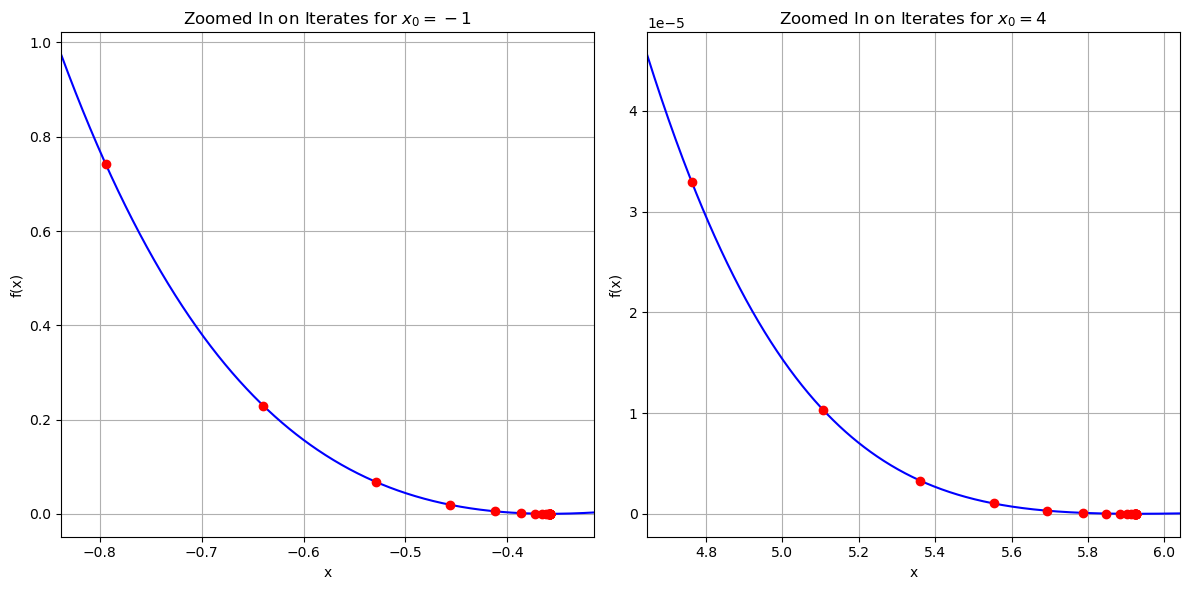

In [10]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import Schel_FULL as sf  # Assuming newton function is inside Schel_FULL

# Define the symbolic variable
x = sym.symbols('x')

# Define the function and its derivative symbolically
f_sym = ((sym.sin(x + (7/2))**2) * sym.exp((1/5) - (2 * x))) / sym.log(x + 5)
df_sym = sym.diff(f_sym, x,1)

# Convert symbolic expressions to numerical functions
f = sym.lambdify(x, f_sym, 'numpy')
df = sym.lambdify(x, df_sym, 'numpy')

# Create a range of values for x
X = np.linspace(-1, 6, 600)  # Extended range for clearer full plot
Y = f(X)

# Initial guess for Newton's method
x1 = -1
x2 = 4

# Perform Newton's method
zero_1, num_it_1, iterati_1 = sf.newton(f, df, x1, 1e-15, 1e-15, 1000)
zero_2, num_it_2, iterati_2 = sf.newton(f, df, x2, 1e-15, 1e-15, 1000)

print("Zero di x = -1 in: ", zero_1)
print("Numero iterazioni di x = -1 = ", num_it_1)
print("Iterati di x = -1: ", iterati_1)

print("Zero di x = 4 in: ", zero_2)
print("Numero iterazioni di x = 4 = ", num_it_2)
print("Iterati di x = 4: ", iterati_2)

# Determine the range of the iterates for zooming
x_min_1 = min(iterati_1)
x_max_1 = max(iterati_1)
x_range_1 = x_max_1 - x_min_1

x_min_2 = min(iterati_2)
x_max_2 = max(iterati_2)
x_range_2 = x_max_2 - x_min_2

# Convert the symbolic function to a LaTeX string
f_latex = sym.latex(f_sym)

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)

# Plot the entire function with LaTeX expression as the title
plt.plot(X, Y, 'b')
plt.title(f'Entire Function Plot: $f(x) = {f_latex}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

# Create subplots

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

# Plot 1: Zoomed in on iterates for x = -1
X_zoom_1 = np.linspace(x_min_1 - 0.1 * x_range_1, x_max_1 + 0.1 * x_range_1, 600)
Y_zoom_1 = f(X_zoom_1)

plt.plot(X_zoom_1, Y_zoom_1, 'b')
plt.scatter(iterati_1, f(np.array(iterati_1)), color='red', zorder=5)
plt.xlim(x_min_1 - 0.1 * x_range_1, x_max_1 + 0.1 * x_range_1)
plt.title(f'Zoomed In on Iterates for $x_0 = -1$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# Plot 2: Zoomed in on iterates for x = 4
X_zoom_2 = np.linspace(x_min_2 - 0.1 * x_range_2, x_max_2 + 0.1 * x_range_2, 600)
Y_zoom_2 = f(X_zoom_2)

plt.subplot(1, 2, 2)
plt.plot(X_zoom_2, Y_zoom_2, 'b')
plt.scatter(iterati_2, f(np.array(iterati_2)), color='red', zorder=5)
plt.xlim(x_min_2 - 0.1 * x_range_2, x_max_2 + 0.1 * x_range_2)
plt.title(f'Zoomed In on Iterates for $x_0 = 4$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


In [11]:
conv1 = sf.stima_ordine(iterati_1, num_it_1)
conv2 = sf.stima_ordine(iterati_2, num_it_2)

print("Stima ordine per x = -1 : ", conv1)
print("Stima ordine per x = 4 : ", conv2)

Stima ordine per x = -1 :  1.0000001303265151
Stima ordine per x = 4 :  1.0000477808999517


Molteplicità di -1 = 2
Molteplicità di 4 = 2
Zero di x = -1 in:  -0.35840734642494904
Numero iterazioni di x = -1 =  5
Iterati di x = -1:  [-0.5882768534161702, -0.40135247738715046, -0.36027201390079466, -0.3584110579884457, -0.35840734642494904]
Zero di x = 4 in:  5.924777951443416
Numero iterazioni di x = 4 =  5
Iterati di x = 4:  [5.5250012518040155, 5.820258357299381, 5.9150260245913255, 5.924682294774475, 5.924777951443416]


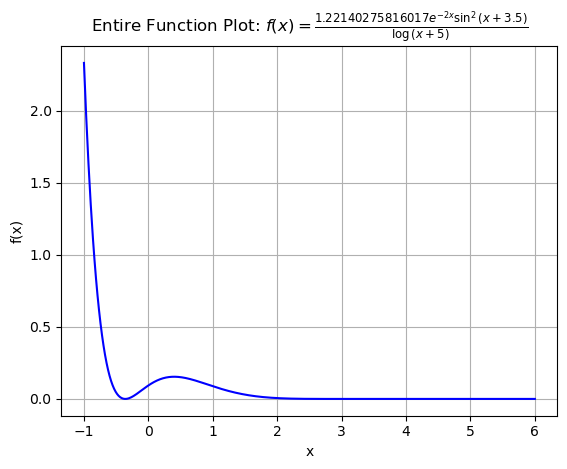

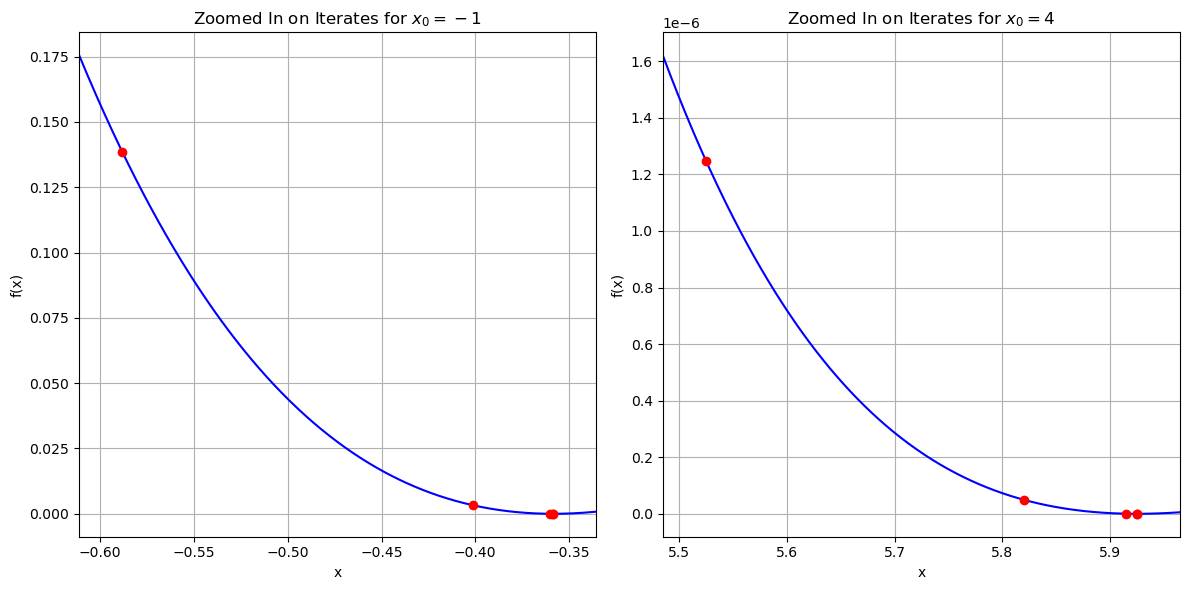

In [12]:

def calcola_molteplicità(f, x0, tol=1e-15):
    # Funzione simbolica e le sue derivate
    derivata = f
    k = 0
    while derivata.subs(x, x0) <=  tol:
        k += 1
        derivata = sym.diff(derivata, x)
    return k

mul1 = calcola_molteplicità(f_sym, zero_1)
mul2 = calcola_molteplicità(f_sym, zero_2)

print("Molteplicità di -1 =",mul1)
print("Molteplicità di 4 =",mul2)

# Perform Newton's method
zero_1, num_it_1, iterati_1 = sf.newton_mod(f, df,mul1, x1, 1e-15, 1e-15, 1000)
zero_2, num_it_2, iterati_2 = sf.newton_mod(f, df,mul2, x2, 1e-15, 1e-15, 1000)

print("Zero di x = -1 in: ", zero_1)
print("Numero iterazioni di x = -1 = ", num_it_1)
print("Iterati di x = -1: ", iterati_1)

print("Zero di x = 4 in: ", zero_2)
print("Numero iterazioni di x = 4 = ", num_it_2)
print("Iterati di x = 4: ", iterati_2)

# Determine the range of the iterates for zooming
x_min_1 = min(iterati_1)
x_max_1 = max(iterati_1)
x_range_1 = x_max_1 - x_min_1

x_min_2 = min(iterati_2)
x_max_2 = max(iterati_2)
x_range_2 = x_max_2 - x_min_2

# Convert the symbolic function to a LaTeX string
f_latex = sym.latex(f_sym)

# Plot the entire function with LaTeX expression as the title
plt.plot(X, Y, 'b')
plt.title(f'Entire Function Plot: $f(x) = {f_latex}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

# Create subplots

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

# Plot 1: Zoomed in on iterates for x = -1
X_zoom_1 = np.linspace(x_min_1 - 0.1 * x_range_1, x_max_1 + 0.1 * x_range_1, 600)
Y_zoom_1 = f(X_zoom_1)

plt.plot(X_zoom_1, Y_zoom_1, 'b')
plt.scatter(iterati_1, f(np.array(iterati_1)), color='red', zorder=5)
plt.xlim(x_min_1 - 0.1 * x_range_1, x_max_1 + 0.1 * x_range_1)
plt.title(f'Zoomed In on Iterates for $x_0 = -1$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# Plot 2: Zoomed in on iterates for x = 4
X_zoom_2 = np.linspace(x_min_2 - 0.1 * x_range_2, x_max_2 + 0.1 * x_range_2, 600)
Y_zoom_2 = f(X_zoom_2)

plt.subplot(1, 2, 2)
plt.plot(X_zoom_2, Y_zoom_2, 'b')
plt.scatter(iterati_2, f(np.array(iterati_2)), color='red', zorder=5)
plt.xlim(x_min_2 - 0.1 * x_range_2, x_max_2 + 0.1 * x_range_2)
plt.title(f'Zoomed In on Iterates for $x_0 = 4$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()